In [11]:
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import vapeplot
import numpy as np

from selection_methods import SelectionMethod

In [13]:
vapeplot.set_palette('cool')
plt.rc('axes', grid=False, facecolor="white")
plt.rcParams.update({'font.size': 18})

In [14]:
path_data = "../../results_explored_by_task/antimicrobial/"
list_documents = os.listdir(path_data)
len(list_documents)

24

In [15]:
list_df = []

for encoder in list_documents:
    list_explored = os.listdir(f"{path_data}{encoder}")
    for element in list_explored:

        df_data = pd.read_csv(f"{path_data}{encoder}/{element}")
        df_data['encoder'] = encoder
        list_df.append(df_data)
df_results = pd.concat(list_df, axis=0)
df_results

,description,validation_accuracy,validation_f1_score,validation_precision,validation_recall,validation_mcc,fit_time,score_time,train_f1_weighted,train_recall_weighted,train_precision_weighted,train_accuracy,iteration,encoder
0,KNeighbors,0.591337,0.580879,0.603099,0.591337,0.195098,0.013047,0.477470,0.578335,0.590883,0.602459,0.590883,1380,Group_4
1,DecisionTree,0.696341,0.696343,0.696346,0.696341,0.392656,0.367740,0.009145,0.689808,0.689865,0.689961,0.689865,1380,Group_4
2,Bagging,0.742942,0.742625,0.743789,0.742942,0.486577,2.487746,0.030902,0.747527,0.747744,0.748750,0.747744,1380,Group_4
3,RandomForest,0.780732,0.780559,0.781326,0.780732,0.561950,3.472812,0.137474,0.779328,0.779372,0.779669,0.779372,1380,Group_4
4,ExtraTrees,0.765497,0.764494,0.769365,0.765497,0.534598,3.991417,0.219211,0.767765,0.768295,0.771019,0.768295,1380,Group_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,GradientBoosting,0.844810,0.844807,0.844812,0.844810,0.689610,435.101882,0.030389,0.834357,0.834369,0.834470,0.834369,9087,prottrans_uniref
7,Hist Gradient Boosting,0.856908,0.856894,0.856983,0.856908,0.713871,22.193766,0.049013,0.848578,0.848582,0.848636,0.848582,9087,prottrans_uniref
8,SVC,0.498133,0.493503,0.498593,0.498133,-0.002785,114.602571,35.960021,0.497779,0.502913,0.502696,0.502913,9087,prottrans_uniref
9,Gaussian Process,0.532487,0.532440,0.532457,0.532487,0.064880,635.836232,127.336353,0.531830,0.531852,0.531866,0.531852,9087,prottrans_uniref


In [16]:
df_results["overffiting_accuracy"] = df_results["validation_accuracy"]/df_results["train_accuracy"]
df_results["overffiting_f1"] = df_results["validation_f1_score"]/df_results["train_f1_weighted"]
df_results["overffiting_precision"] = df_results["validation_precision"]/df_results["train_precision_weighted"]
df_results["overffiting_recall"] = df_results["validation_recall"]/df_results["train_recall_weighted"]
df_results

,description,validation_accuracy,validation_f1_score,validation_precision,validation_recall,validation_mcc,fit_time,score_time,train_f1_weighted,train_recall_weighted,train_precision_weighted,train_accuracy,iteration,encoder,overffiting_accuracy,overffiting_f1,overffiting_precision,overffiting_recall
0,KNeighbors,0.591337,0.580879,0.603099,0.591337,0.195098,0.013047,0.477470,0.578335,0.590883,0.602459,0.590883,1380,Group_4,1.000769,1.004398,1.001062,1.000769
1,DecisionTree,0.696341,0.696343,0.696346,0.696341,0.392656,0.367740,0.009145,0.689808,0.689865,0.689961,0.689865,1380,Group_4,1.009387,1.009473,1.009254,1.009387
2,Bagging,0.742942,0.742625,0.743789,0.742942,0.486577,2.487746,0.030902,0.747527,0.747744,0.748750,0.747744,1380,Group_4,0.993579,0.993442,0.993373,0.993579
3,RandomForest,0.780732,0.780559,0.781326,0.780732,0.561950,3.472812,0.137474,0.779328,0.779372,0.779669,0.779372,1380,Group_4,1.001745,1.001580,1.002125,1.001745
4,ExtraTrees,0.765497,0.764494,0.769365,0.765497,0.534598,3.991417,0.219211,0.767765,0.768295,0.771019,0.768295,1380,Group_4,0.996358,0.995740,0.997855,0.996358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,GradientBoosting,0.844810,0.844807,0.844812,0.844810,0.689610,435.101882,0.030389,0.834357,0.834369,0.834470,0.834369,9087,prottrans_uniref,1.012513,1.012525,1.012393,1.012513
7,Hist Gradient Boosting,0.856908,0.856894,0.856983,0.856908,0.713871,22.193766,0.049013,0.848578,0.848582,0.848636,0.848582,9087,prottrans_uniref,1.009812,1.009800,1.009835,1.009812
8,SVC,0.498133,0.493503,0.498593,0.498133,-0.002785,114.602571,35.960021,0.497779,0.502913,0.502696,0.502913,9087,prottrans_uniref,0.990496,0.991409,0.991839,0.990496
9,Gaussian Process,0.532487,0.532440,0.532457,0.532487,0.064880,635.836232,127.336353,0.531830,0.531852,0.531866,0.531852,9087,prottrans_uniref,1.001194,1.001146,1.001111,1.001194


In [17]:
df_results_train = df_results[['description', 'train_f1_weighted',
            'train_recall_weighted', 'train_precision_weighted', 'train_accuracy',
            'iteration', 'encoder']]

df_results_train.columns = ["Algorithm", "F1", "Recall", "Precision", "Accuracy", "Iteration", "Encoder"]
df_results_train['Stage'] = "Training"

df_results_validation = df_results[['description', 'validation_accuracy', 'validation_f1_score', 'validation_precision',
    'validation_recall', 'validation_mcc', 'iteration', 'encoder']]

df_results_validation.columns = ["Algorithm", "Accuracy", "F1", "Precision", "Recall", "MCC", "Iteration", "Encoder"]
df_results_validation['Stage'] = "Validating"

df_concat = pd.concat([df_results_train, df_results_validation], axis=0)
df_concat["Task"] = "Antimicrobial"

df_concat.to_csv("../../results_explored_by_task/summary_models_explored/antimicrobial_explored.csv", index=False)


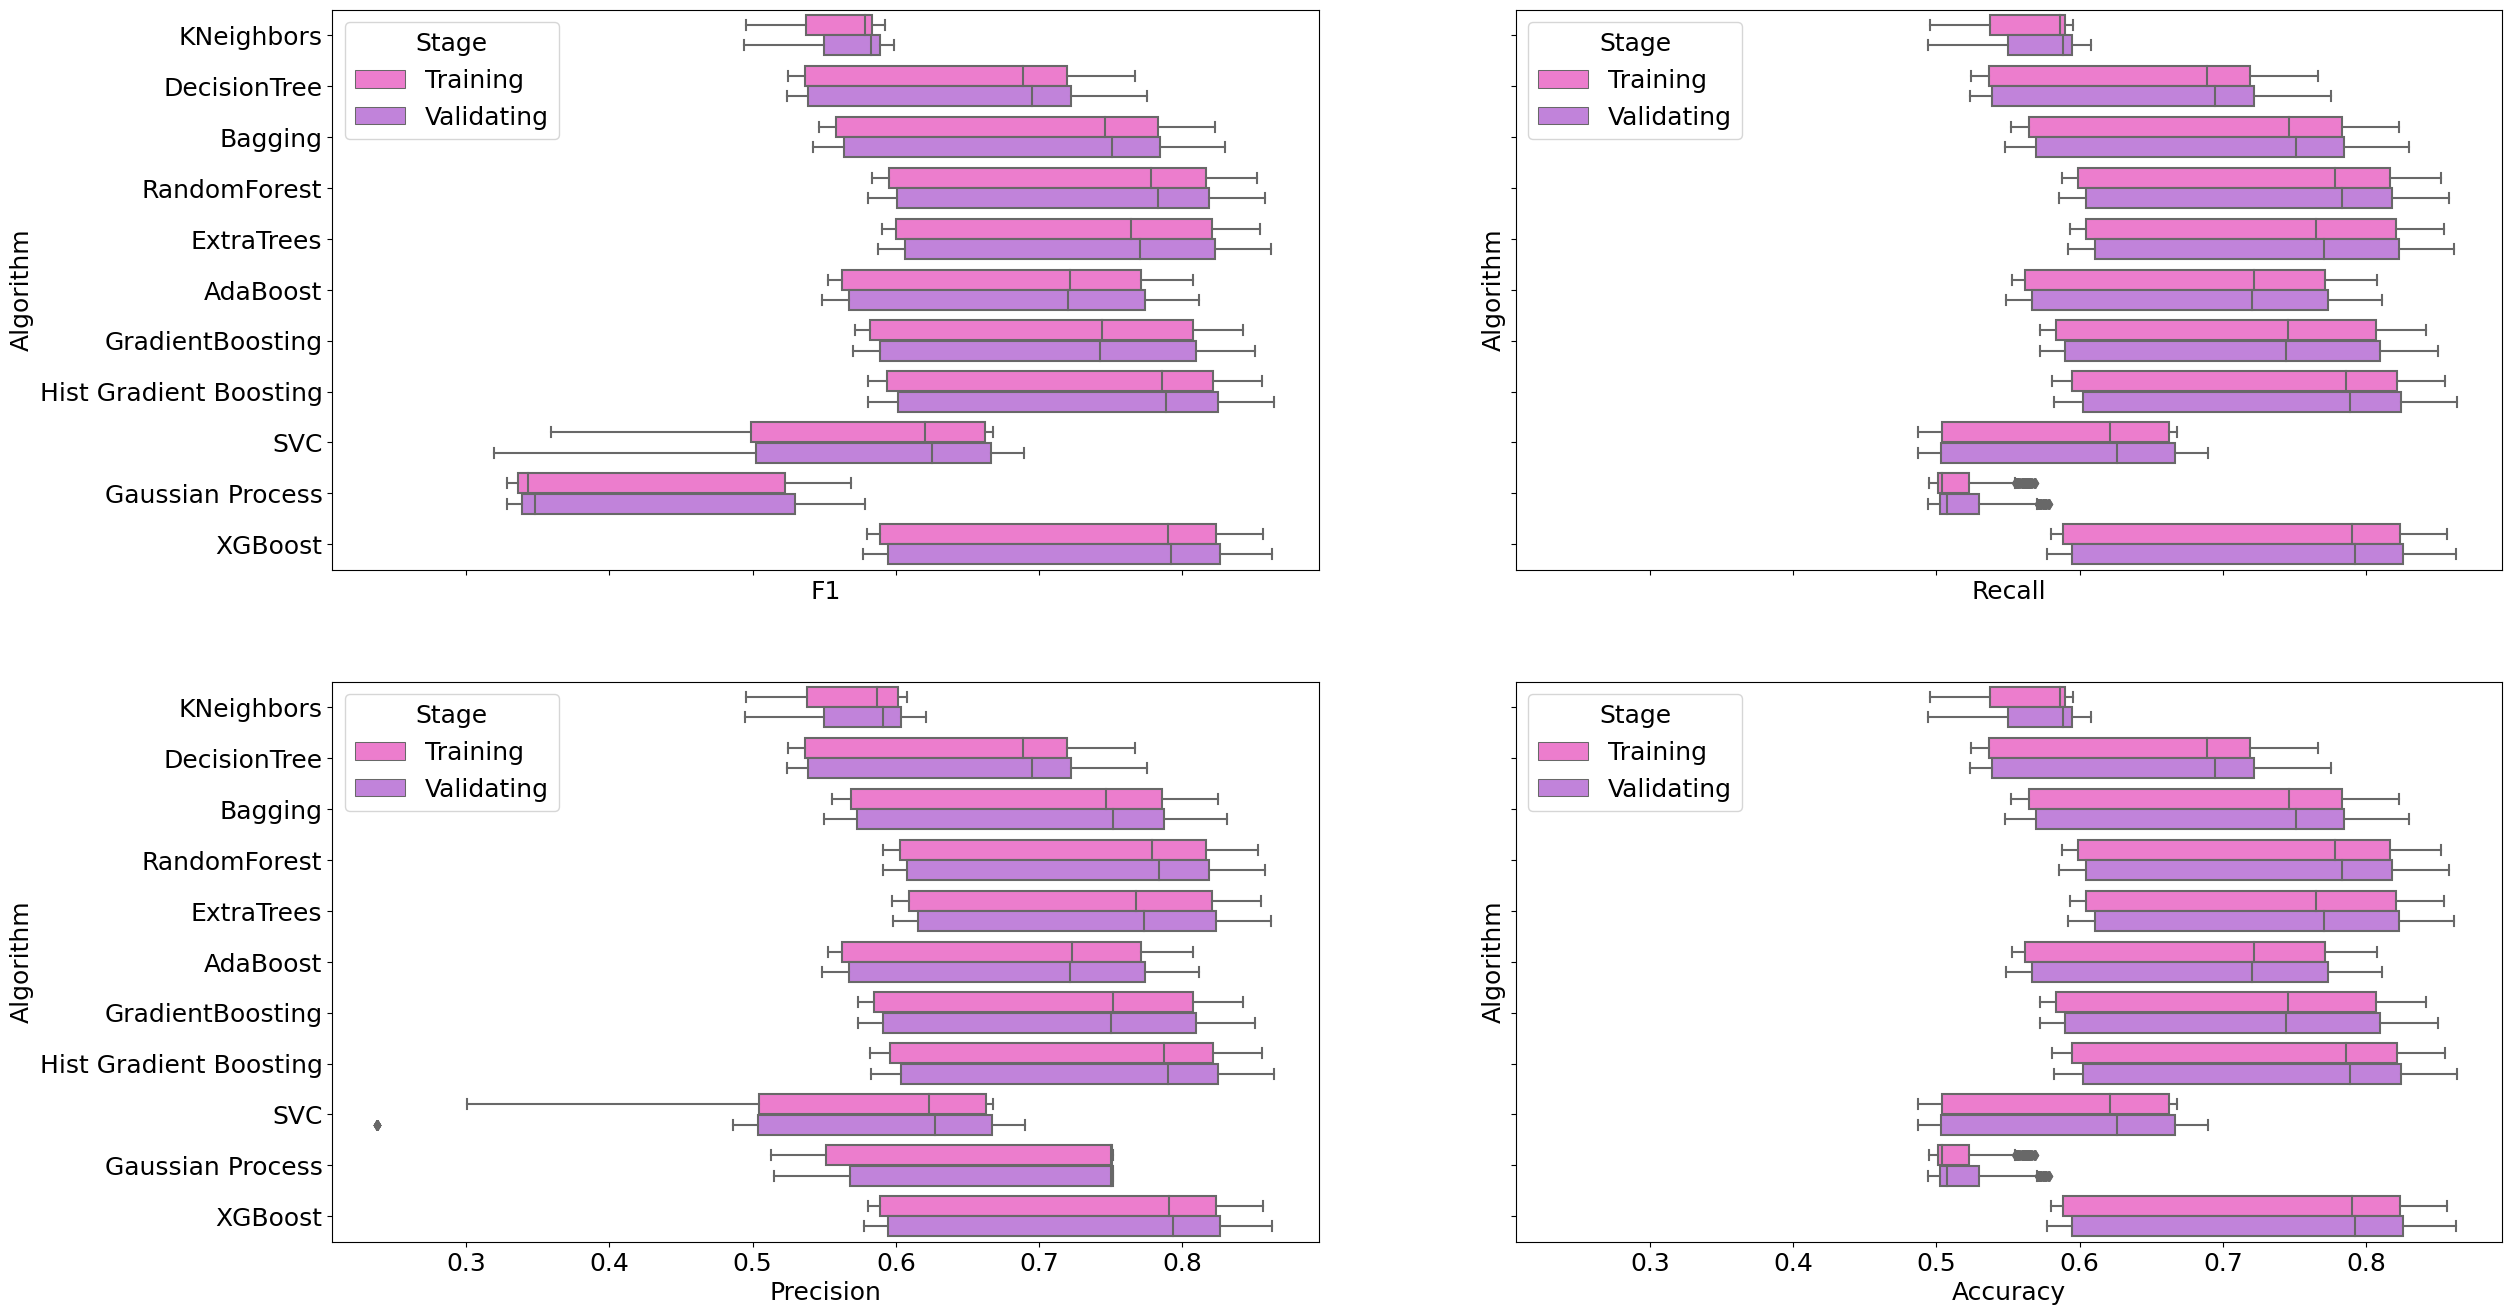

In [18]:
fig, axes = plt.subplots(2,2, figsize=(28,16), sharex=True, sharey=True)
ax1 = sns.boxplot(ax=axes[0][0], data=df_concat, x="F1", hue="Stage", y="Algorithm")
ax2 = sns.boxplot(ax=axes[0][1], data=df_concat, x="Recall", hue="Stage", y="Algorithm")
ax3 = sns.boxplot(ax=axes[1][0], data=df_concat, x="Precision", hue="Stage", y="Algorithm")
ax4 = sns.boxplot(ax=axes[1][1], data=df_concat, x="Accuracy", hue="Stage", y="Algorithm")

plt.savefig("../../results_explored_by_task/summary_models_explored/antimicrobial/algorithm_distribution.png")

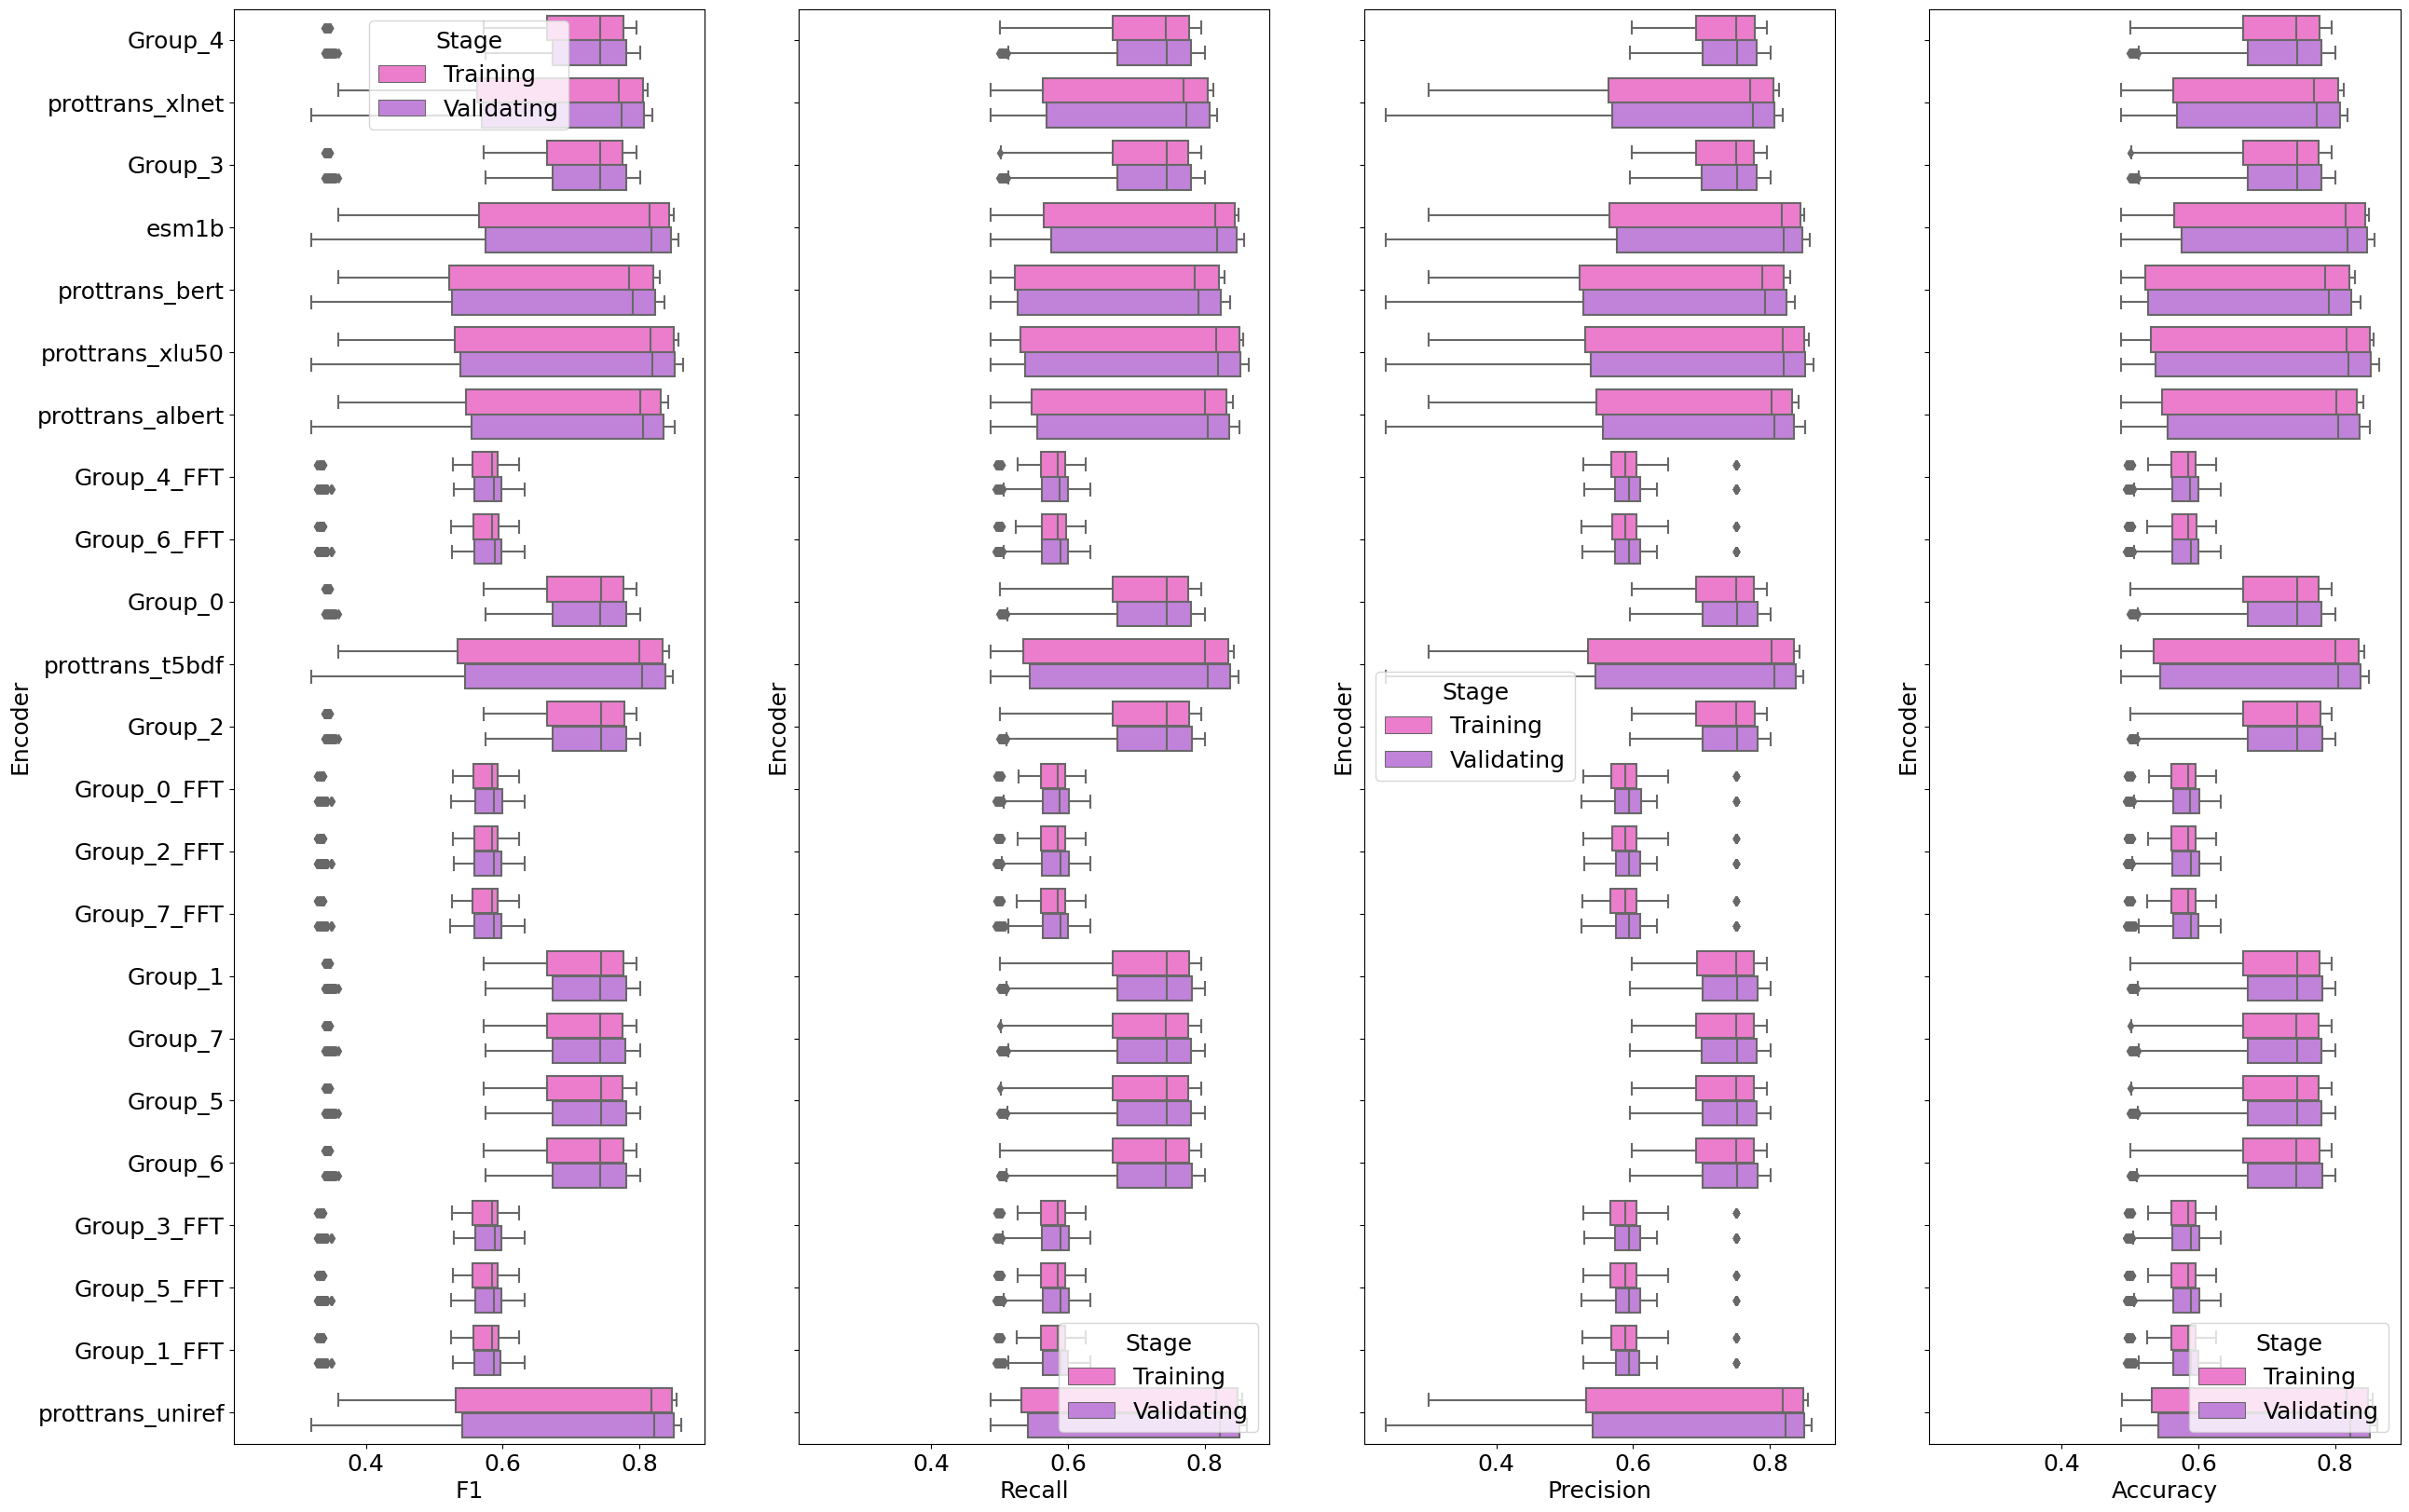

In [19]:
fig, axes = plt.subplots(1,4, figsize=(30,20), sharex=True, sharey=True)
ax1 = sns.boxplot(ax=axes[0], data=df_concat, x="F1", hue="Stage", y="Encoder")
ax2 = sns.boxplot(ax=axes[1], data=df_concat, x="Recall", hue="Stage", y="Encoder")
ax3 = sns.boxplot(ax=axes[2], data=df_concat, x="Precision", hue="Stage", y="Encoder")
ax4 = sns.boxplot(ax=axes[3], data=df_concat, x="Accuracy", hue="Stage", y="Encoder")

plt.savefig("../../results_explored_by_task/summary_models_explored/antimicrobial/encoder_distribution.png")

In [20]:
selection_instance = SelectionMethod()
df_selection = selection_instance.select(15, df_results_train, df_results_validation)

df_selection.to_csv("../../results_explored_by_task/summary_models_explored/antimicrobial/selected_combinations.csv", index=False)

df_selection

,Algorithm,Encoder,mean_accuracy_training_x,mean_f_score_training_x,mean_precision_training_x,mean_recall_training_x,mean_accuracy_testing_x,mean_f_score_testing_x,mean_precision_testing_x,mean_recall_testing_x,mean_accuracy_testing_y,mean_f_score_testing_y,mean_precision_testing_y,mean_recall_testing_y,mean_accuracy_training_y,mean_f_score_training_y,mean_precision_training_y,mean_recall_training_y,Voting
88,ExtraTrees,prottrans_t5bdf,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
89,ExtraTrees,prottrans_uniref,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
91,ExtraTrees,prottrans_xlu50,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
132,GradientBoosting,prottrans_albert,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
250,XGBoost,prottrans_uniref,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
